In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from imblearn.over_sampling import SMOTE

In [1]:
!pip3 install catboost



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [3]:
!gdown --id 1KXxSQvHfw4ho2WW3atcMzI2_9BZJt4b5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KXxSQvHfw4ho2WW3atcMzI2_9BZJt4b5
To: /content/kddcup.data_10_percent
100% 74.9M/74.9M [00:00<00:00, 92.8MB/s]


In [13]:
#loading the dataset 10 percent of kdd cup99
df_names =['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds' ,
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate' ,
'same_srv_rate' ,
'diff_srv_rate',
'srv_diff_host_rate' ,
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate' ,
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
           'prediction']

data = pd.read_csv('/content/kddcup.data_10_percent', header = None)
data.columns = df_names
data.head()
# Filter the dataset where the protocol_type is 'icmp'
icmp_services = data[data['protocol_type'] == 'icmp']['service'].unique()

# Print the unique services
print(icmp_services)




#dropping unused columns :
df.drop(columns = ['duration',
'protocol_type','flag','dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds' ,
'is_host_login',
'is_guest_login','serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate' ,
'same_srv_rate' ,
'diff_srv_rate','dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate' ,'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate'],inplace=True)
df.sample(20)
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])
X.sample(20)
y.sample(10)
y.value_counts()

src = df['src_bytes'].unique()
df.sample(20)

['eco_i' 'ecr_i' 'urh_i' 'urp_i' 'tim_i' 'red_i']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


# Convert categorical target to numerical for SMOTE
y_train_categorical = pd.Categorical(y_train)
y_train_encoded = y_train_categorical.codes
# Determine the number of samples for each class
target_sample_counts = {
    'normal.'  : 247278,
'neptune.' :  150000,
'back.' :  120000,
'satan.'  :   10000,
'ipsweep.' :    5000,
'portsweep.' : 2500,
'warezclient.'  : 2000
}

# Convert the target_sample_counts dictionary to use the numerical codes
target_sample_counts_encoded = {y_train.cat.categories.get_loc(k): v for k, v in target_sample_counts.items()}

# Apply SMOTE
smote = SMOTE(sampling_strategy=target_sample_counts_encoded, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Convert back to original labels
y_train_resampled = pd.Series(y_train_resampled).map({v: k for k, v in dict(enumerate(y_train.cat.categories)).items()})


AttributeError: 'DataFrame' object has no attribute 'cat'

In [ ]:
class_distribution = y.value_counts(normalize=True) * 100
print(class_distribution)

prediction      
smurf.              56.837665
neptune.            21.699685
normal.             19.691066
back.                0.445932
satan.               0.321646
ipsweep.             0.252418
portsweep.           0.210517
warezclient.         0.206469
teardrop.            0.198170
pod.                 0.053439
nmap.                0.046759
guess_passwd.        0.010728
buffer_overflow.     0.006073
land.                0.004251
warezmaster.         0.004048
imap.                0.002429
rootkit.             0.002024
loadmodule.          0.001822
ftp_write.           0.001619
multihop.            0.001417
phf.                 0.000810
perl.                0.000607
spy.                 0.000405
Name: proportion, dtype: float64


In [ ]:
# Filter the DataFrame for rows where service is 'http'
http_df = df[df['service'] == 'http']

# Group by 'Target' and count the number of samples in each group
http_counts = http_df.groupby('prediction').size()

# Display the result
print(http_counts)

prediction
back.          2203
ipsweep.          3
neptune.        192
normal.       61886
phf.              4
portsweep.        3
satan.            2
dtype: int64


In [ ]:
# Filter the DataFrame for rows where service is 'http'
ecri_df = df[df['service'] == 'ecr_i']

# Group by 'Target' and count the number of samples in each group
ecri = ecri_df.groupby('prediction').size()

# Display the result
print(ecri)

prediction
ipsweep.           4
nmap.              1
normal.          345
pod.             259
portsweep.         1
smurf.        280790
dtype: int64


In [ ]:
# Filter the DataFrame for rows where service is 'http'
smurf_df = df[df['prediction'] == 'smurf.']

# Group by 'Target' and count the number of samples in each group
http_counts = smurf_df.groupby('service').size()

# Display the result
print(http_counts)

service
ecr_i    280790
dtype: int64


In [ ]:
categorical_features = ['service']
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)



In [ ]:
model = CatBoostClassifier(
    iterations=100,

)

model.fit(train_pool, eval_set=test_pool, verbose=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.294278
0:	learn: 0.0876884	test: 0.0876058	best: 0.0876058 (0)	total: 13.6s	remaining: 22m 27s
10:	learn: 0.0158437	test: 0.0152787	best: 0.0152787 (10)	total: 2m 26s	remaining: 19m 44s
20:	learn: 0.0078900	test: 0.0075950	best: 0.0075950 (20)	total: 4m 36s	remaining: 17m 21s
30:	learn: 0.0056052	test: 0.0056896	best: 0.0056896 (30)	total: 6m 47s	remaining: 15m 7s
40:	learn: 0.0046303	test: 0.0050515	best: 0.0050515 (40)	total: 8m 58s	remaining: 12m 55s
50:	learn: 0.0041018	test: 0.0046082	best: 0.0046082 (50)	total: 11m 10s	remaining: 10m 44s
60:	learn: 0.0035919	test: 0.0042348	best: 0.0042348 (60)	total: 13m 20s	remaining: 8m 31s
70:	learn: 0.0033026	test: 0.0040771	best: 0.0040771 (70)	total: 15m 31s	remaining: 6m 20s
80:	learn: 0.0031339	test: 0.0040072	best: 0.0040072 (80)	total: 17m 42s	remaining: 4m 9s
90:	learn: 0.0029880	test: 0.0039137	best: 0.0039137 (90)	total: 19m 52s	remaining: 1m 57s
99:	learn: 0.0028376	test: 0.0038408	best: 0.0038408 (99)	total:

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9991903489595985


In [ ]:

# Save the trained model to a file
with open('catboost_model5999.pkl', 'wb') as f:
    pickle.dump(model, f)



In [ ]:
#load the model

with open('/content/catboost_model999.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
testing = pd.read_csv('features.csv')
testing.head(20)
prediction = model.predict(testing)
preds = pd.DataFrame (prediction)
preds.sample(20)
services = testing['service']
preds['service'] = services
pred_csv = preds.to_csv('preds_csv')


In [ ]:

# Get feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances.sort_values('importance', ascending=False)


,importance
src_bytes,36.453812
dst_host_count,14.526394
service,12.251123
dst_host_srv_rerror_rate,10.956436
dst_host_srv_diff_host_rate,10.109810
count,7.183407
dst_host_srv_count,5.930905
srv_count,2.586373
srv_diff_host_rate,0.001740


from matplotlib import pyplot as plt
_df_0['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

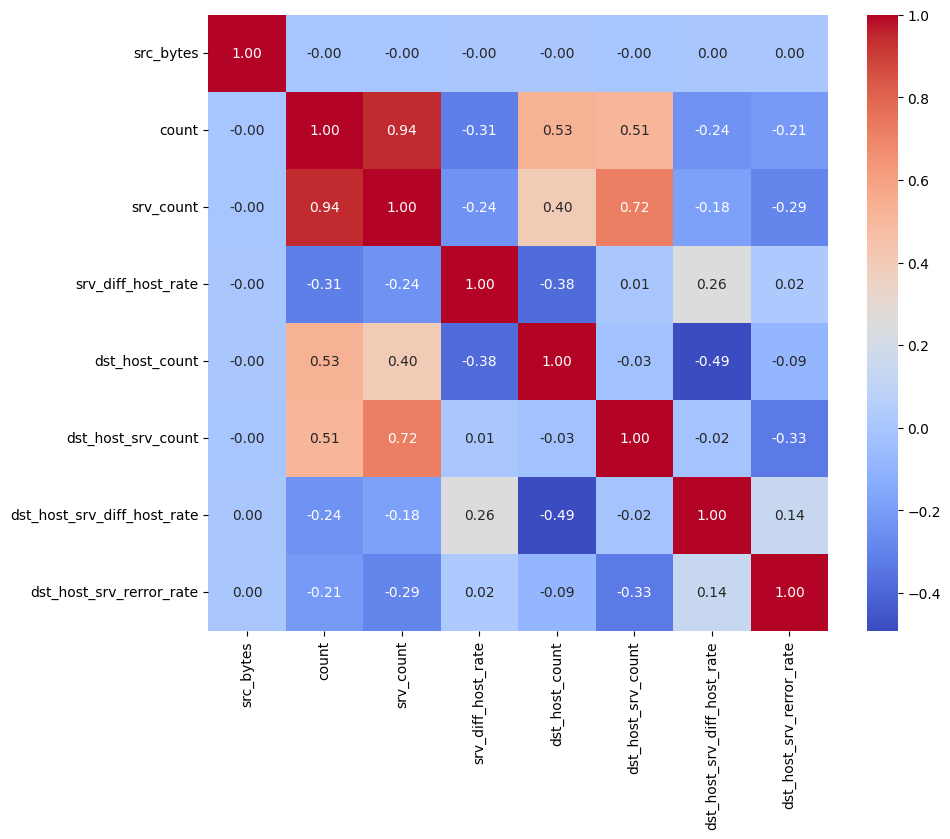

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
X_train_vis=X_train.drop('service',axis=1)
corr_matrix = X_train_vis.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


normal.         
smurf.              56.802609
neptune.            21.707370
normal.             19.713018
back.                0.448362
satan.               0.324380
ipsweep.             0.248978
portsweep.           0.206469
teardrop.            0.203939
warezclient.         0.203433
pod.                 0.056678
nmap.                0.047569
guess_passwd.        0.011386
buffer_overflow.     0.005314
land.                0.004554
warezmaster.         0.003795
rootkit.             0.002277
imap.                0.002277
loadmodule.          0.002024
ftp_write.           0.001771
multihop.            0.001771
perl.                0.000759
phf.                 0.000759
spy.                 0.000506
Name: proportion, dtype: float64


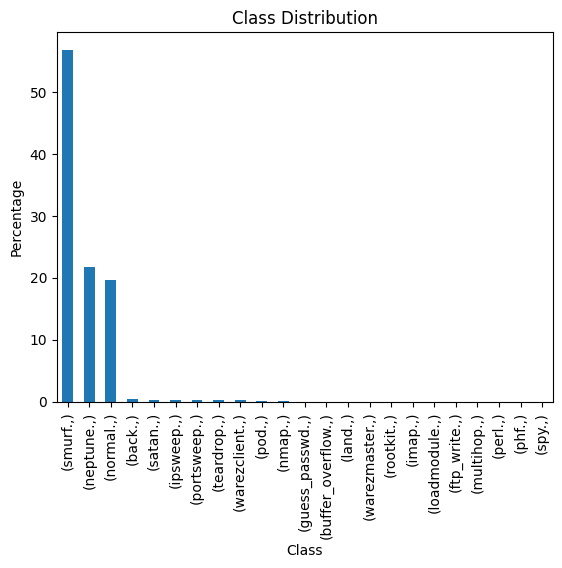

In [ ]:
import pandas as pd

# Assuming `y_train` contains your target labels
class_distribution = y_train.value_counts(normalize=True) * 100
print(class_distribution)

# Plot the class distribution
class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()


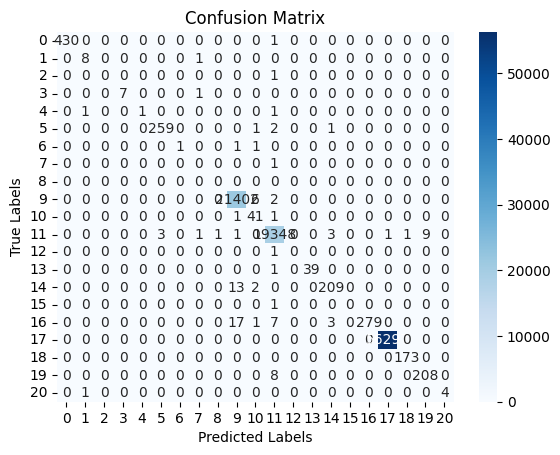

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming `X_test` and `y_test` are your test data and labels
y_pred = loaded_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

IndexError: index 18 is out of bounds for axis 1 with size 9

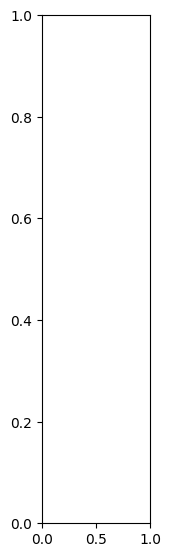

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(loaded_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train)

# Analyze a single prediction
# Select an index from X_test where the prediction is "Smurf"
smurf_index = list(y_pred).index('smurf.')
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[smurf_index], X_test.iloc[smurf_index])


explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary for a specific feature
shap.summary_plot(shap_values, X_test)

# Analyze a single prediction where the prediction is "Smurf"
# Let's assume index 2 corresponds to a prediction of "Smurf"
smurf_index = 2  # Replace with the correct index from X_test where prediction is "Smurf"
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[smurf_index], X_test.iloc[smurf_index])

In [ ]:
!pip3 install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00
